In [2]:
# NonLinear kernel SVM implementation for IRIS dataset
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1, stratify   = y)

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# RBF kernel implementation for SVM
svm = SVC(kernel = 'rbf', gamma = 100, C = 1.0, random_state = 1)

In [7]:
svm.fit(X_train_std, y_train)

SVC(gamma=100, random_state=1)

In [8]:
y_pred = svm.predict(X_test_std)

In [9]:
print("Misclassified samples %d" % (y_test - y_pred).sum())

Misclassified samples -2


In [10]:
from sklearn.metrics import accuracy_score
print("Accuracy %.2f" % (accuracy_score(y_test, y_pred)* 100))

Accuracy 93.33


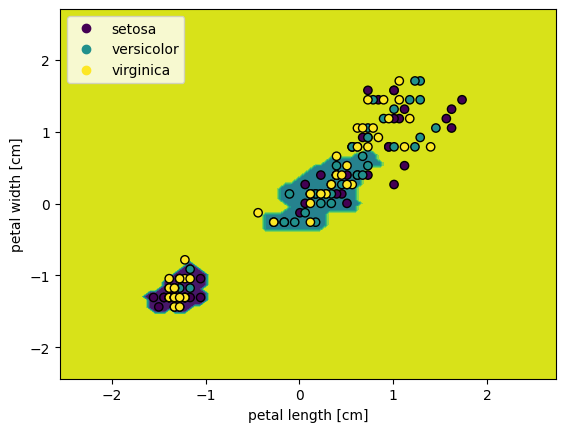

In [11]:
# Plot decision regions
from sklearn.inspection import DecisionBoundaryDisplay
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
disp = DecisionBoundaryDisplay.from_estimator(
    svm,
    X_combined,
    response_method="predict",
)

scatter = disp.ax_.scatter(X_combined[:, 0], X_combined[:, 1], c=iris.target, edgecolor="k")
plt.xlabel("petal length [cm]")
plt.ylabel("petal width [cm]")
handles, labels = scatter.legend_elements()  # Automatically creates handles for scatter points
plt.legend(handles, iris.target_names, loc='upper left') 
plt.show()

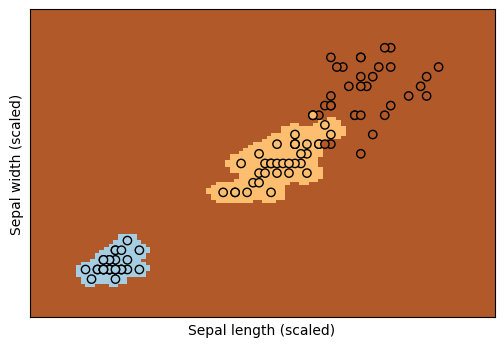

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots(figsize=(6, 4))
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train_std,  # Use the scaled data for decision boundary
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length (scaled)",
    ylabel="Sepal width (scaled)",
    eps=0.5,
)

# Step 4: Plot the scaled training points
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, edgecolors="k", cmap=plt.cm.Paired)

# Hide axis ticks for a cleaner plot
plt.xticks(())
plt.yticks(())

plt.show()